In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
def load_data():
  data = pd.read_csv('/content/megathrust Labeled.csv')

  return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,conversation_id_str,created_at,favorite_count,full_text,Labeling,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.829660e+18,Fri Aug 30 23:19:12 +0000 2024,3,Pemprov Jateng Keluarkan Surat Edaran Waspada ...,Netral,1.829660e+18,NaN,NaN,in,NaN,0,0,3,https://x.com/VIVAcoid/status/1829660169997062311,4.173094e+07,VIVAcoid
1,1.829640e+18,Fri Aug 30 22:17:09 +0000 2024,1,BMKG sebut ada empat kabupaten yang berpotensi...,Netral,1.829640e+18,NaN,NaN,in,Jakarta,0,1,0,https://x.com/kompascom/status/182964455365956...,2.334396e+07,kompascom
2,1.829610e+18,Fri Aug 30 19:42:11 +0000 2024,58,DETIK-DETIK PERGESEKAN DUA LEMPENG TEKTONIK YA...,Netral,1.829610e+18,https://pbs.twimg.com/media/GWQQjpKawAAMCG9.jpg,NaN,in,🔕,0,1,0,https://x.com/fyageee/status/1829605556270874753,1.296530e+18,fyageee
3,1.829570e+18,Fri Aug 30 17:10:40 +0000 2024,1,the govt sucks economy sucks kpop sucks blm lg...,Negative,1.829570e+18,NaN,NaN,in,she/her • dnfwc,0,0,0,https://x.com/nympshs/status/1829567423483400386,8.717840e+17,nympshs
4,1.829550e+18,Fri Aug 30 15:56:34 +0000 2024,0,Waspada Gempa Megathrust Banyuwangi Pasang EWS...,Netral,1.829550e+18,NaN,NaN,in,Surabaya,0,0,0,https://x.com/beritajatimcom/status/1829548775...,2.128707e+07,beritajatimcom


In [ ]:
df = pd.DataFrame(tweet_df[['full_text', 'Labeling']])

In [ ]:
df.shape

(307, 2)

In [ ]:
df['lower'] = df['full_text'].str.lower()
df.head()

,full_text,Labeling,lower
0,Pemprov Jateng Keluarkan Surat Edaran Waspada ...,Netral,pemprov jateng keluarkan surat edaran waspada ...
1,BMKG sebut ada empat kabupaten yang berpotensi...,Netral,bmkg sebut ada empat kabupaten yang berpotensi...
2,DETIK-DETIK PERGESEKAN DUA LEMPENG TEKTONIK YA...,Netral,detik-detik pergesekan dua lempeng tektonik ya...
3,the govt sucks economy sucks kpop sucks blm lg...,Negative,the govt sucks economy sucks kpop sucks blm lg...
4,Waspada Gempa Megathrust Banyuwangi Pasang EWS...,Netral,waspada gempa megathrust banyuwangi pasang ews...


In [ ]:
import re # impor modul regular expression

# PROSES TEXT CLEANING

def hapus_angka(tweet):
  tweet = re.sub(r"\d+", "", tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#+', '', tweet)
  #remove mentions
  tweet = re.sub(r'@\w+', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  #Aphabets only, exlude numbers and special characters
  tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)

  return tweet

In [ ]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

In [ ]:
df.head()

,full_text,Labeling,lower,h_angka
0,Pemprov Jateng Keluarkan Surat Edaran Waspada ...,Netral,pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluarkan surat edaran waspada ...
1,BMKG sebut ada empat kabupaten yang berpotensi...,Netral,bmkg sebut ada empat kabupaten yang berpotensi...,bmkg sebut ada empat kabupaten yang berpotensi...
2,DETIK-DETIK PERGESEKAN DUA LEMPENG TEKTONIK YA...,Netral,detik-detik pergesekan dua lempeng tektonik ya...,detik detik pergesekan dua lempeng tektonik ya...
3,the govt sucks economy sucks kpop sucks blm lg...,Negative,the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...
4,Waspada Gempa Megathrust Banyuwangi Pasang EWS...,Netral,waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import TweetTokenizer
import re

# TOKENISASI

def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags (only removing the hash # sign from the word)
    tweet = re.sub(r'#', '', tweet)
    # remove commas
    tweet = re.sub(r',', '', tweet)
    # remove numbers
    tweet = re.sub('[0-9]+', '', tweet)

    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    return tweet_tokens

df['tokenizing'] = df['h_angka'].apply(lambda x: fulltext(x))


In [ ]:
df.head()

,full_text,Labeling,lower,h_angka,tokenizing
0,Pemprov Jateng Keluarkan Surat Edaran Waspada ...,Netral,pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluarkan surat edaran waspada ...,"[pemprov, jateng, keluarkan, surat, edaran, wa..."
1,BMKG sebut ada empat kabupaten yang berpotensi...,Netral,bmkg sebut ada empat kabupaten yang berpotensi...,bmkg sebut ada empat kabupaten yang berpotensi...,"[bmkg, sebut, ada, empat, kabupaten, yang, ber..."
2,DETIK-DETIK PERGESEKAN DUA LEMPENG TEKTONIK YA...,Netral,detik-detik pergesekan dua lempeng tektonik ya...,detik detik pergesekan dua lempeng tektonik ya...,"[detik, detik, pergesekan, dua, lempeng, tekto..."
3,the govt sucks economy sucks kpop sucks blm lg...,Negative,the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...,"[the, govt, sucks, economy, sucks, kpop, sucks..."
4,Waspada Gempa Megathrust Banyuwangi Pasang EWS...,Netral,waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...,"[waspada, gempa, megathrust, banyuwangi, pasan..."


In [ ]:
#tambahan
import re

# PROSES FILTERING ATAU STOPWORDS REMOMVAL

sw = []
def stopwords(text):
    '''a function for removing the stopword'''
    filtered_words = []

    for word in text:
        if word not in sw:
            filtered_words.append(word)

    # Gabungkan kembali kata-kata yang tidak dihapus
    text = " ".join(filtered_words)

    # Hindari penggunaan regex untuk penghapusan duplikasi yang berlebihan
    # Kode regex dihilangkan untuk menghindari kehilangan informasi kata seperti 'lolos' dan 'lulus'

    return text

df['filtering'] = df['tokenizing'].apply(stopwords)
df['filtering']


,filtering
0,pemprov jateng keluarkan surat edaran waspada ...
1,bmkg sebut ada empat kabupaten yang berpotensi...
2,detik detik pergesekan dua lempeng tektonik ya...
3,the govt sucks economy sucks kpop sucks blm lg...
4,waspada gempa megathrust banyuwangi pasang ews...
...,...
302,gempa megathrust mulai aktifkah
303,kesaksian warga yogyakarta saat diguncang gemp...
304,potensi gempa megathrust vs gempa jogja malam ini
305,serem banget itu gempa merembet kemarin bali h...


In [ ]:
df.head()

,full_text,Labeling,lower,h_angka,tokenizing,filtering
0,Pemprov Jateng Keluarkan Surat Edaran Waspada ...,Netral,pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluarkan surat edaran waspada ...,"[pemprov, jateng, keluarkan, surat, edaran, wa...",pemprov jateng keluarkan surat edaran waspada ...
1,BMKG sebut ada empat kabupaten yang berpotensi...,Netral,bmkg sebut ada empat kabupaten yang berpotensi...,bmkg sebut ada empat kabupaten yang berpotensi...,"[bmkg, sebut, ada, empat, kabupaten, yang, ber...",bmkg sebut ada empat kabupaten yang berpotensi...
2,DETIK-DETIK PERGESEKAN DUA LEMPENG TEKTONIK YA...,Netral,detik-detik pergesekan dua lempeng tektonik ya...,detik detik pergesekan dua lempeng tektonik ya...,"[detik, detik, pergesekan, dua, lempeng, tekto...",detik detik pergesekan dua lempeng tektonik ya...
3,the govt sucks economy sucks kpop sucks blm lg...,Negative,the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...,"[the, govt, sucks, economy, sucks, kpop, sucks...",the govt sucks economy sucks kpop sucks blm lg...
4,Waspada Gempa Megathrust Banyuwangi Pasang EWS...,Netral,waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...,"[waspada, gempa, megathrust, banyuwangi, pasan...",waspada gempa megathrust banyuwangi pasang ews...


In [ ]:
#tambahan
import re

# NORMALISASI

# Kamus singkatan dan kata baku
singkatan_kamus = {
    'gk': 'tidak',
    'tdk': 'tidak',
    'gx': 'tidak',
    'gak': 'tidak',
    'tp': 'tapi',
    'ajh': 'saja',
    'utk': 'untuk',
    'gmn': 'gimana',
    'drpd': 'dari pada',
    'srt': 'serta',
    'utk': 'untuk',
    'pd': 'pada',
    'yg': 'yang',
    'aja': 'saja',
    'btw': 'omong-omong',
    'kpd': 'kepada',
    'dgn': 'dengan',
    'dll': 'dan lain-lain',
    'klo': 'kalau',
    'bbrp': 'beberapa',
    'wkwk': 'tertawa',
    'haha': 'tertawa',
    'huhu': 'sedih',
    'plis': 'tolong',
    'tp': 'tapi',
    'gmana': 'bagaimana',
    'nggak': 'tidak',
    'gabut': 'bosan',
    'ngapain': 'melakukan apa',
    'mantul': 'mantap betul',
    'pfft': 'meremehkan',
    'lol': 'tertawa terbahak-bahak',
    'baper': 'terbawa perasaan',
    'lebay': 'berlebihan',
    'alay': 'berlebihan dalam penampilan atau tingkah laku',
    'kepo': 'ingin tahu banyak',
    'cmiiw': 'koreksi jika saya salah',
    'omdo': 'omong doang',
    'gaje': 'tidak jelas',
    'gws': 'semoga cepat sembuh',
    'php': 'pemberi harapan palsu',
    'woles': 'santai',
    'kemenhub': 'kementerian perhubungan',
    'dishub': 'dinas perhubungan',
    'mager': 'malas gerak',
    'jgn': 'jangan',
    'sdh': 'sudah',
    'lolos': 'lulus',
    'dki': 'jakarta'
    # Anda bisa menambahkan lebih banyak singkatan jika diperlukan
}

def replace_singkatan(tweet):
    words = tweet.split()
    replaced_words = []
    for word in words:
        # Cek apakah kata ada dalam kamus singkatan
        word_lower = word.lower()
        if word_lower in singkatan_kamus:
            # Ganti dengan kata baku dari kamus
            replaced_words.append(singkatan_kamus[word_lower])
        else:
            replaced_words.append(word)
    return " ".join(replaced_words)

# Contoh penggunaan dalam DataFrame
df['tweet_clean'] = df['filtering'].apply(replace_singkatan)
df['tweet_clean']


,tweet_clean
0,pemprov jateng keluarkan surat edaran waspada ...
1,bmkg sebut ada empat kabupaten yang berpotensi...
2,detik detik pergesekan dua lempeng tektonik ya...
3,the govt sucks economy sucks kpop sucks blm lg...
4,waspada gempa megathrust banyuwangi pasang ews...
...,...
302,gempa megathrust mulai aktifkah
303,kesaksian warga yogyakarta saat diguncang gemp...
304,potensi gempa megathrust vs gempa jogja malam ini
305,serem banget itu gempa merembet kemarin bali h...


In [ ]:
# file path: stopwords_removal_id.py

# STOPWORDS REMOVAL DAN FILTERING

def remove_stopwords(text):
    # Daftar stopwords umum dalam bahasa Indonesia
    stopwords = set([
        'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'pada', 'adalah', 'dengan', 'sebagai', 'bahwa',
        'oleh', 'dalam', 'itu', 'ini', 'untuk', 'dengan', 'dari', 'juga', 'akan', 'tidak', 'ada',
        'karena', 'jadi', 'atau', 'hanya', 'saja', 'kita', 'mereka', 'sudah', 'belum', 'bisa',
        'kalau', 'lagi', 'tetapi', 'masih', 'sesudah', 'harus', 'sehingga', 'demi', 'pun', 'bagi', 'wkwkwkwkwkw',
        'hingga', 'sebelum', 'ketika', 'saat', 'sejak', 'sebuah', 'seperti', 'antara', 'banyak', 'cincay',
        'lebih', 'daripada', 'terhadap', 'melalui', 'namun', 'sampai', 'jika', 'malah', 'bahkan',
        'sedang', 'apakah', 'semua', 'lagi', 'mengapa', 'tidak', 'setelah', 'tanpa', 'cukup',
        'hampir', 'maka', 'agar', 'sekitar', 'apapun', 'adanya', 'sedikit', 'bukan', 'bagaimana',
        'berapa', 'sebelumnya', 'tentu', 'kami', 'kenapa', 'biar', 'kenapa', 'dengan', 'sering',
        'maupun', 'tetapi', 'tetap', 'demikian', 'serta', 'oleh', 'setiap', 'paling', 'antara',
        'amp', 'ga', 'gak', 'gx', 'ya', 'nya', 'aja', 'gt', 'kan', 'dah', 'ev', 'tak', 'kok',
        'innovacommunity', 'radioelshinta', 'lah', 'tau', 'jd', 'bla', 'jg', 'ken', 'om', 'ex',
        'tapi', 'apa', 'mau', 'udah', 'kalo', 'lain', 'dulu', 'masa', 'dia', 'yah', 'cek', 'ngga',
        'buat'
    ])

    # Memisahkan teks menjadi kata-kata individual
    words = text.split()

    # Menghapus kata-kata yang ada dalam daftar stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # Menggabungkan kembali kata-kata yang tersisa menjadi sebuah string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Contoh penggunaan fungsi
text = "Ini adalah contoh sederhana gx untuk mendemonstrasikan bagaimana fungsi bekerja."
clean_text = remove_stopwords(text)
print(clean_text)

df['stopwords'] = df['tweet_clean'].apply(lambda x: remove_stopwords(x)) # Apply the renamed function

contoh sederhana mendemonstrasikan fungsi bekerja.


In [ ]:
#tambahan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# STEMMING

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar kata-kata yang tidak ingin di-stem
stopwords_list = [ 'lolos', 'lulus']  # Tambahkan kata-kata lain sesuai kebutuhan

def stemming(tweet):
    words = tweet.split()
    stemmed_words = []
    for word in words:
        if word.lower() in stopwords_list:
            stemmed_words.append(word)  # Tetap mempertahankan kata yang ada dalam daftar pengecualian
        else:
            stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

df['bersih'] = df['stopwords'].apply(stemming)
df['bersih']


,bersih
0,pemprov jateng keluar surat edar waspada ancam...
1,bmkg sebut empat kabupaten potensi dampak gemp...
2,detik detik gesek dua lempeng tektonik timbul ...
3,the govt sucks economy sucks kpop sucks blm lg...
4,waspada gempa megathrust banyuwangi pasang ews...
...,...
302,gempa megathrust mulai aktif
303,saksi warga yogyakarta guncang gempa akibat ak...
304,potensi gempa megathrust vs gempa jogja malam
305,rem banget gempa rembet kemarin bal hari jaten...


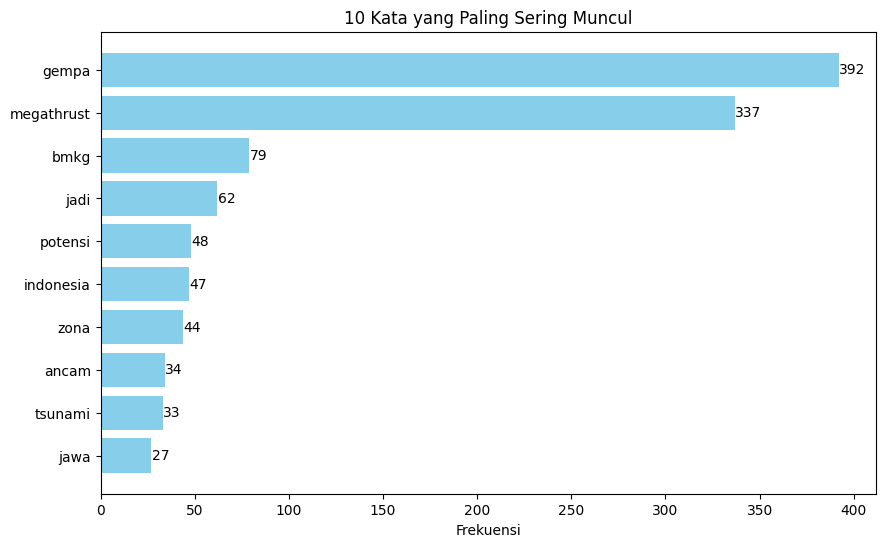

In [ ]:
#Menggunakan Matplotlib untuk Bar Chart (tambahan)
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Misalnya kolom 'tweet_clean' sudah berisi teks yang diproses
all_words = ' '.join(df['bersih']).split()
word_freq = Counter(all_words)

# Mengambil 20 kata yang paling sering muncul
most_common_words = word_freq.most_common(10)

# Memisahkan kata dan frekuensi untuk visualisasi
words, counts = zip(*most_common_words)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frekuensi')
plt.title('10 Kata yang Paling Sering Muncul')
plt.gca().invert_yaxis()  # Membalik urutan kata agar kata yang paling sering muncul di atas
for i, v in enumerate(counts):
    plt.text(v + 0.1, i, str(v), color='black', va='center', ha='left')
plt.show()

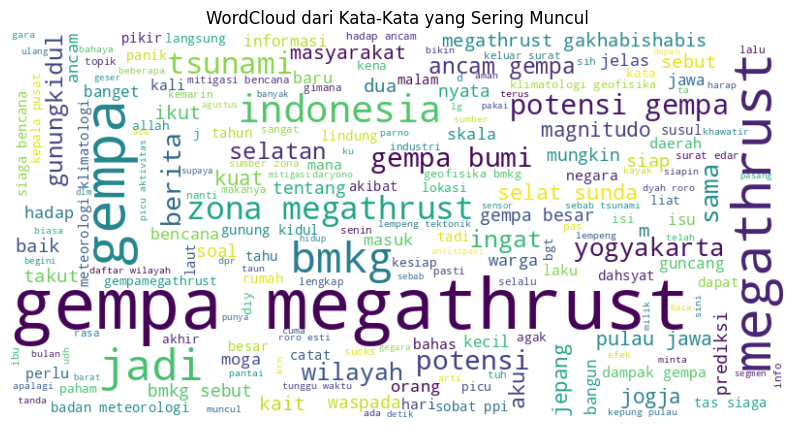

In [ ]:
#Menggunakan WordCloud untuk Visualisasi Kata (tambahan)
from wordcloud import WordCloud

# Gabungkan semua kata dalam kolom 'tweet_clean'
text = ' '.join(df['bersih'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualisasi WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kata-Kata yang Sering Muncul')
plt.show()


In [ ]:
df.head()

,full_text,Labeling,lower,h_angka,tokenizing,filtering,tweet_clean,stopwords,bersih
0,Pemprov Jateng Keluarkan Surat Edaran Waspada ...,Netral,pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluarkan surat edaran waspada ...,"[pemprov, jateng, keluarkan, surat, edaran, wa...",pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluarkan surat edaran waspada ...,pemprov jateng keluar surat edar waspada ancam...
1,BMKG sebut ada empat kabupaten yang berpotensi...,Netral,bmkg sebut ada empat kabupaten yang berpotensi...,bmkg sebut ada empat kabupaten yang berpotensi...,"[bmkg, sebut, ada, empat, kabupaten, yang, ber...",bmkg sebut ada empat kabupaten yang berpotensi...,bmkg sebut ada empat kabupaten yang berpotensi...,bmkg sebut empat kabupaten berpotensi terdampa...,bmkg sebut empat kabupaten potensi dampak gemp...
2,DETIK-DETIK PERGESEKAN DUA LEMPENG TEKTONIK YA...,Netral,detik-detik pergesekan dua lempeng tektonik ya...,detik detik pergesekan dua lempeng tektonik ya...,"[detik, detik, pergesekan, dua, lempeng, tekto...",detik detik pergesekan dua lempeng tektonik ya...,detik detik pergesekan dua lempeng tektonik ya...,detik detik pergesekan dua lempeng tektonik me...,detik detik gesek dua lempeng tektonik timbul ...
3,the govt sucks economy sucks kpop sucks blm lg...,Negative,the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...,"[the, govt, sucks, economy, sucks, kpop, sucks...",the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...,the govt sucks economy sucks kpop sucks blm lg...
4,Waspada Gempa Megathrust Banyuwangi Pasang EWS...,Netral,waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...,"[waspada, gempa, megathrust, banyuwangi, pasan...",waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...,waspada gempa megathrust banyuwangi pasang ews...


In [ ]:
df.to_excel('dataUASbersih.xlsx', index=False)